In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("data_titanic/train.csv")
df_copy = df.copy() 

In [67]:
# Handling missing values
df_copy['Age'].fillna(df_copy['Age'].median(), inplace=True)
df_copy.drop(columns=['Cabin'], inplace=True)
df_copy['Embarked'].fillna(df_copy['Embarked'].mode()[0], inplace=True)

C:\Users\And3w\AppData\Local\Temp\ipykernel_23768\780193419.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Age'].fillna(df_copy['Age'].median(), inplace=True)
C:\Users\And3w\AppData\Local\Temp\ipykernel_23768\780193419.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [68]:
# Encoding categorical variables
df_copy['Sex'] = df_copy['Sex'].map({'male': 0, 'female': 1})
embarked_dummies = pd.get_dummies(df_copy['Embarked'], prefix='Embarked')
df_copy = pd.concat([df_copy, embarked_dummies], axis=1)
df_copy.drop(columns=['Embarked'], inplace=True)

In [69]:
# Standardizing numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
df_copy[numerical_features] = scaler.fit_transform(df_copy[numerical_features])


In [70]:
df_copy = df_copy.drop(columns=['PassengerId', 'Name', 'Ticket'])
print(df_copy.head())

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_C  \
0         0       3    0 -0.565736      1      0 -0.502445       False   
1         1       1    1  0.663861      1      0  0.786845        True   
2         1       3    1 -0.258337      0      0 -0.488854       False   
3         1       1    1  0.433312      1      0  0.420730       False   
4         0       3    0  0.433312      0      0 -0.486337       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

X = df_copy[features]
y = df_copy['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on resampled data
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

Model Evaluation:
Accuracy: 0.82
Precision: 0.76
Recall: 0.82
ROC-AUC Score: 0.88


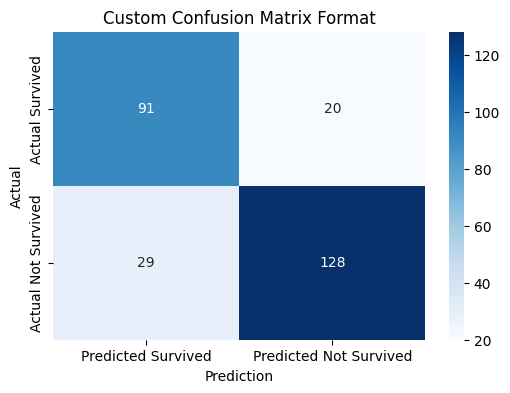


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       157
           1       0.76      0.82      0.79       111

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.82      0.82      0.82       268



In [72]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

custom_conf_matrix = np.array([
    [conf_matrix[1, 1], conf_matrix[1, 0]],  # TP | FN
    [conf_matrix[0, 1], conf_matrix[0, 0]]   # FP | TN
])

plt.figure(figsize=(6, 4))
sns.heatmap(custom_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Survived', 'Predicted Not Survived'], 
            yticklabels=['Actual Survived', 'Actual Not Survived'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Custom Confusion Matrix Format')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

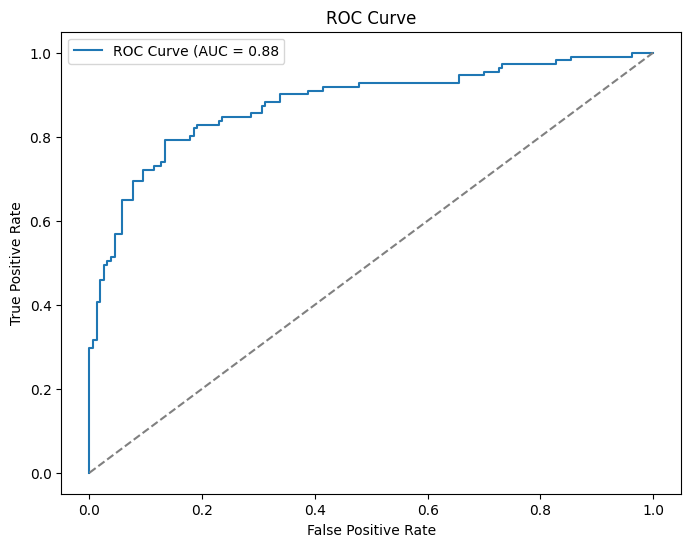

In [73]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()